<a href="https://colab.research.google.com/github/kudason/MAT3562_ComputerVision/blob/main/Lab2/KhuatDangSon_20002159_Lab2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing with opencv

## Activity 1: Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Activity 2: Shape Drawing

**Initial Image**

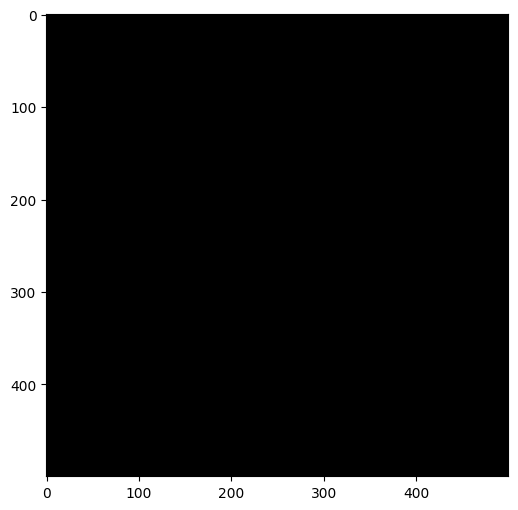

In [ ]:
# Initial Image
img = np.zeros([500, 500, 3])
plt.figure(figsize=(6, 6))
plt.imshow(img)

**Draw rectangle**

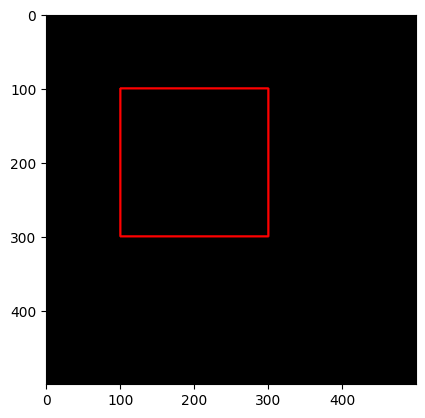

In [ ]:
# Draw a rectangle
cp = img.copy()
rectang = cv2.rectangle(cp, (100, 100), (300, 300), (255, 0, 0), 2)
plt.imshow(rectang)

**Draw Circle**

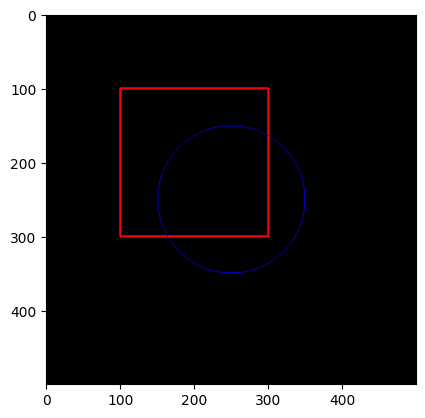

In [ ]:
cir = cv2.circle(cp, (250, 250), 100, (0, 0, 255), 1)
plt.imshow(cir)

**Insert Text**

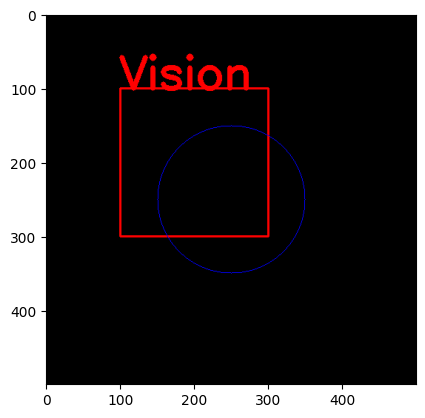

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
new_img = cv2.putText(cp, 'Vision', (100, 100), font, 2, (255, 0, 0), 5, cv2.LINE_AA)
plt.imshow(new_img)

**Draw Line**

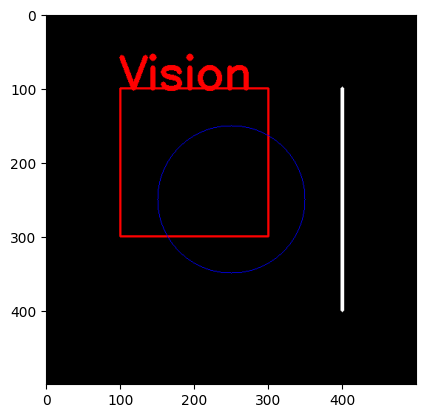

In [ ]:
line = cv2.line(cp, (400, 100), (400, 400), (255, 255, 255), 3)
plt.imshow(line)

**Draw Polygon**

[[[100 350]]

 [[300 400]]

 [[350 450]]

 [[300 480]]

 [[150 450]]

 [[100 350]]]


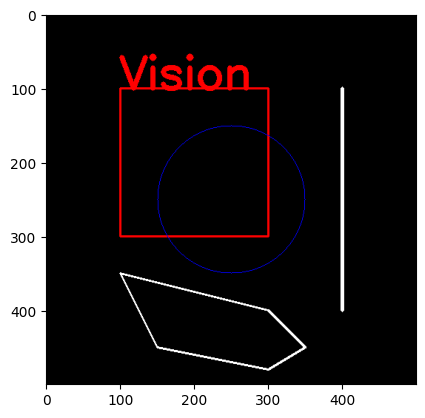

In [ ]:
pts = np.array([[100, 350], [300, 400],
                [350, 450], [300, 480],
                [150, 450], [100, 350]],
               np.int32)

pts = pts.reshape((-1, 1, 2))
print(pts)

a = cv2.polylines(cp, [pts], True, (125, 125, 125), 2)

plt.imshow(a)

## Activity 3: Image Interactive

**Add Image**

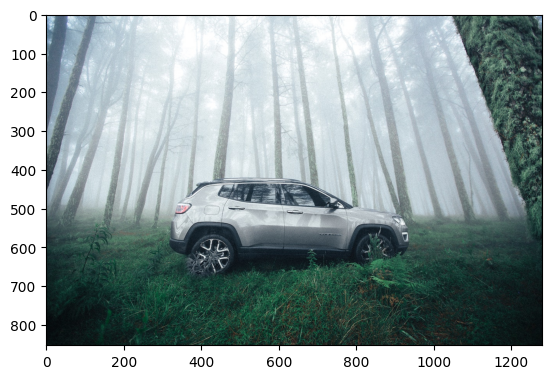

In [ ]:
img1 = cv2.imread('car.jpg')
# Convert image to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(img1)

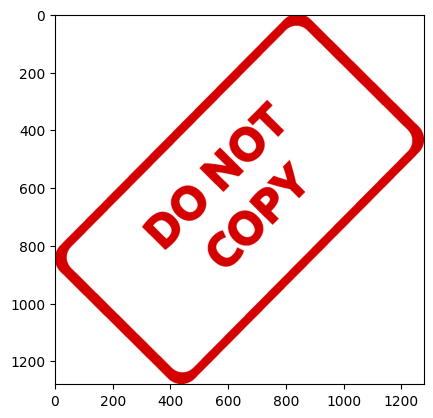

In [ ]:
img2 = cv2.imread('watermark_no_copy.png')
# Convert image to rgb
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(img2)

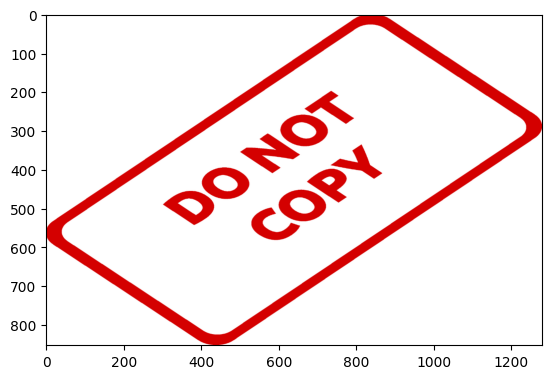

In [ ]:
img2_resized = cv2.resize(img2, (1280, 853))
plt.imshow(img2_resized)

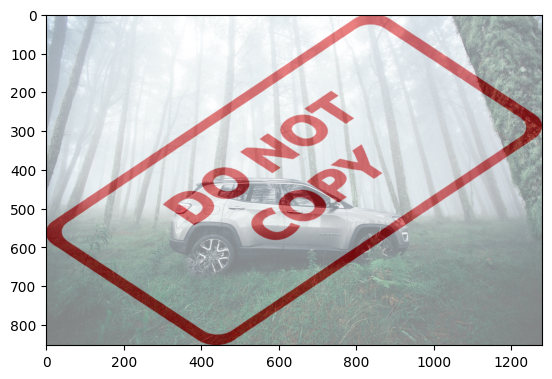

In [ ]:
dst = cv2.addWeighted(img1, 0.5, img2_resized, 0.5, 0.0)
plt.imshow(dst)

**Paste Image**

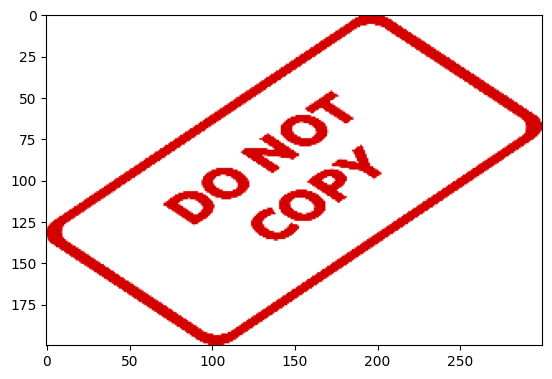

In [ ]:
small_img = cv2.resize(img2, (300, 200))
plt.imshow(small_img)

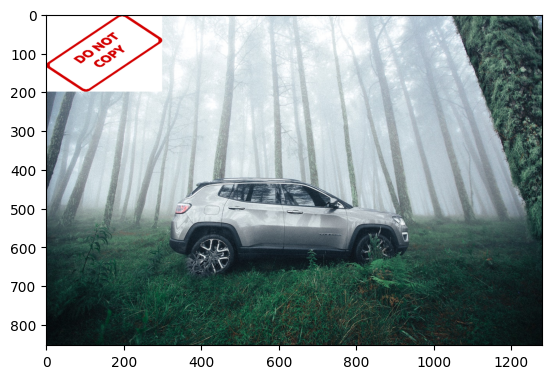

In [ ]:
img1_cp = img1.copy()
img1_cp[0:small_img.shape[0], 0:small_img.shape[1]] = small_img
plt.imshow(img1_cp)

**Image Clip**

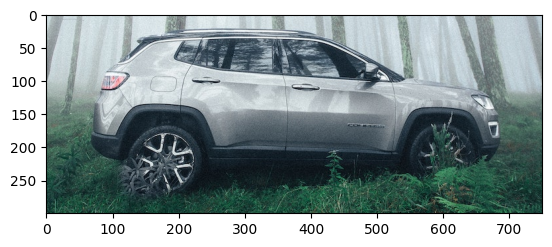

In [ ]:
roi = img1[400:700, 250:1000]
plt.imshow(roi)

**Mix Image**

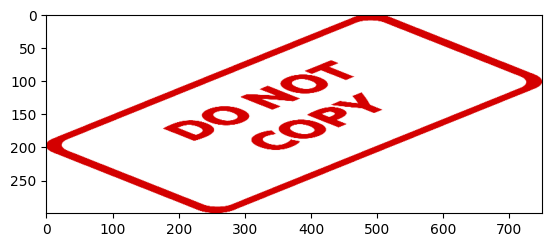

In [ ]:
small_img = cv2.resize(img2, (750, 300))
plt.imshow(small_img)

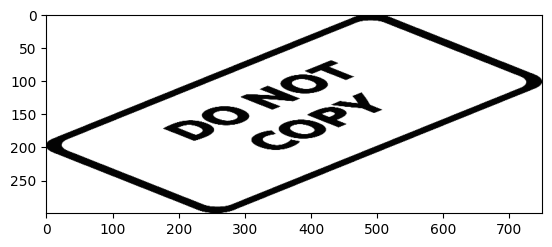

In [ ]:
# Convert to gray
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)
plt.imshow(small_img_gray, cmap='gray')

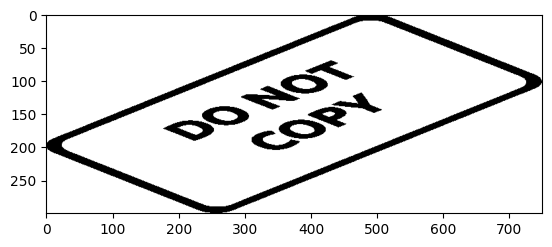

In [ ]:
# Take mask
_, mask = cv2.threshold(small_img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')

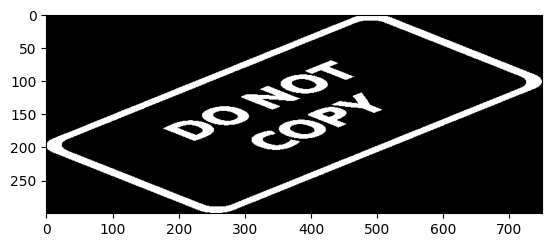

In [ ]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')

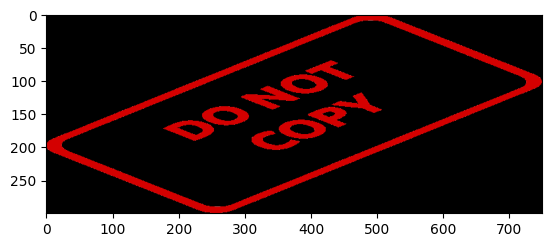

In [ ]:
foreground = cv2.bitwise_and(small_img, small_img, mask=mask_inv)
plt.imshow(foreground)

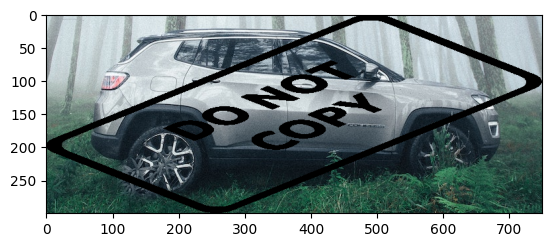

In [ ]:
background = cv2.bitwise_or(roi, roi, mask=mask)
plt.imshow(background)

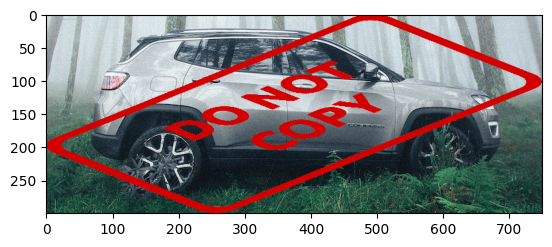

In [ ]:
final_roi = cv2.add(background, foreground)
plt.imshow(final_roi)

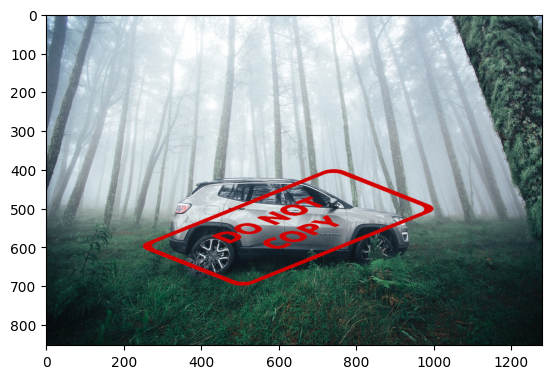

In [ ]:
img1[400:700, 250:1000] = final_roi
plt.imshow(img1)

# Intensity Transformations

## Log Transformations

<ipython-input-25-8bceccfaef49>:6: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)


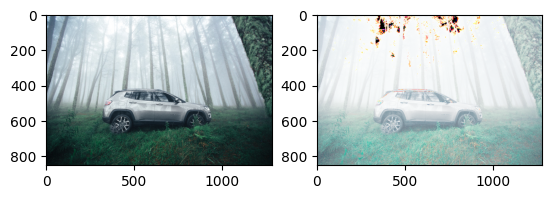

In [ ]:
# Open image
img = cv2.imread('car.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Apply log transform
c = 255 / (np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)
# Specify the data type
log_transformed = np.array(log_transformed, dtype=np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(log_transformed)

## Gamma Transformations

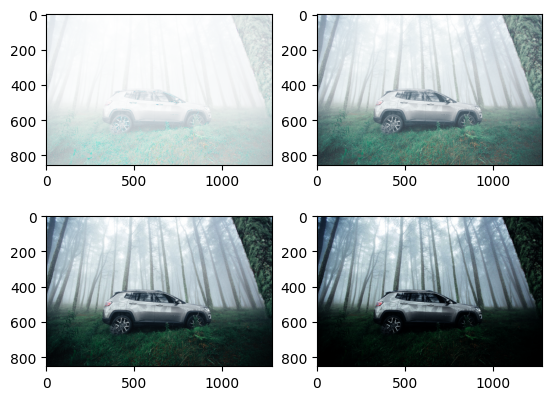

In [ ]:
i = 1
for gamma in [0.1, 0.5, 1.2, 2.2]:
  # Apply gamma correction
  gamma_corrected = np.array(255*(img / 255) ** gamma, dtype='uint8')
  plt.subplot(2, 2, i)
  plt.imshow(gamma_corrected)
  i += 1

## Piecewise - Linear Transformation

In [ ]:
def pixelVal(pix, r1, s1, r2, s2):
  if (0 <= pix and pix <= r1):
    return (s1 / r1) * pix

  elif (r1 < pix and pix <= r2):
    return ((s2-s1)/(r2-r1)) * (pix-r1) + s1

  else:
    return ((255-s2)/(255-r2)) * (pix-r2) + s2

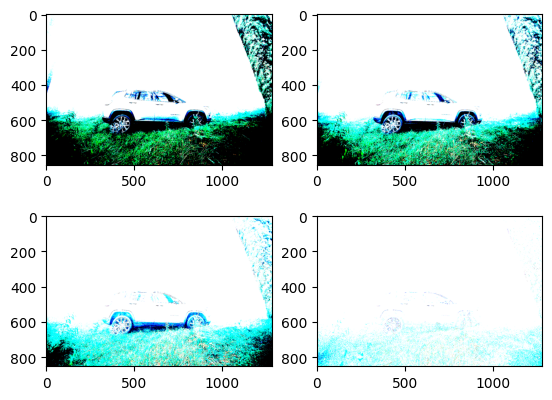

In [ ]:
# Define params
r1 = [70, 50, 30, 10]
s1 = [0, 0, 0, 0]
r2 = [140, 160, 180, 200]
s2 = [255, 255, 255, 255]

# Vectorize the function to apply it to each value in the numpy array
pixelVal_vec = np.vectorize(pixelVal)

for i in range(4):
  # Apply contrast stretching
  contrast_stretched = pixelVal_vec(img, r1[i], s1[i], r2[i], s2[i])
  plt.subplot(2, 2, i+1)
  plt.imshow(contrast_stretched)

## Equalize Histogram

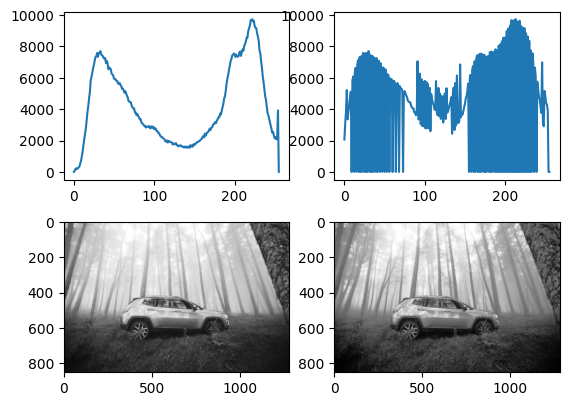

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hist_eq_gray = cv2.equalizeHist(gray)
hist = cv2.calcHist([gray], channels = [0], histSize=[256], ranges = (0, 255), mask = None)

hist2 = cv2.calcHist([hist_eq_gray], channels = [0], histSize=[256], ranges = (0, 255), mask = None)

plt.subplot(2, 2, 1)
plt.plot(hist)

plt.subplot(2, 2, 2)
plt.plot(hist2)

plt.subplot(2, 2, 3)
plt.imshow(gray, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(hist_eq_gray, cmap='gray')